In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns


In [ ]:
data = sns.load_dataset('titanic')

# **Categorical Encoding**

* Categorical data is a type of data that is used to group information with similar characteristics, while numerical data is a type of data that expresses information in the form of numbers.

Example of categorical data: gender




* Use case: most of the time categorical values in the data set are reapted suppose marital status is marries or single here the column contain two labels repetativly so by tranfoem thease values into encoded variables using diffrent types categorical encoders.

> * **Why do we need encoding?**


* Most machine learning algorithms cannot handle categorical variables unless we convert them to numerical values

* Many algorithm’s performances even vary based upon how the categorical variables are encoded


> **Categorical variables can be divided into two categories:**

* **Nominal:** no particular order
  * **example:** gender is a categorical variable having two categories (Male and Female) with no inherent ordering between them. Another example is Country (India, Australia, America, and so forth).

* **Ordinal:** there is some order between values
  * **example:** consider temperature as a variable with three distinct (but related) categories (low, medium, high). Another example is an education degree (Ph.D., Master’s, or Bachelor’s).

## **Different Approaches to Handle Categorical Data**



1.  Label Encoding
2. One-hot Encoding
3. One Hot Encoding with multiple categories
4. Ordinal Encoding
5. Frequency Encoding
6. Mean Encoding



## **1. Label Encoding**

>**Label Encoding**

* In label encoding, each category is assigned a value from 1 through N where N is the number of categories for the feature. There is no relation or order between these assignments.

* **Example Of Label Encoding**
    * Suppose we have a column Height in some dataset that has elements as Tall, Medium, and short. To convert this categorical column into a numerical column we will apply label encoding to this column. After applying label encoding, the Height column is converted into a numerical column having elements 0,1, and 2 where 0 is the label for tall, 1 is the label for medium, and 2 is the label for short height.


Height------> Height

Tall-------------->	   0

Medium------->		 1

Short------------>		   2

In [ ]:
data['embarked']

,embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


In [ ]:
# label encoding using sklerarn
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

X = encoder.fit_transform(data['embarked'])
X

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 3, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2,
       2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 2,
       1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1,
       2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0,
       2, 2, 2, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1,

In [ ]:
print(data['embarked'].unique())
print("Transformed values")
np.unique(X) # 3 = nan

['S' 'C' 'Q' nan]
Transformed values


array([0, 1, 2, 3])

## **2. One-hot Encoding**

* In this method, each category is mapped to a vector that contains 1 and 0 denoting the presence or absence of the feature. The number of vectors depends on the number of categories for features.
  * Suppose idf the vector have 3 non-identicle(individual) feature then the vector is [001]
  
  * so the total degits in the vector is 3

  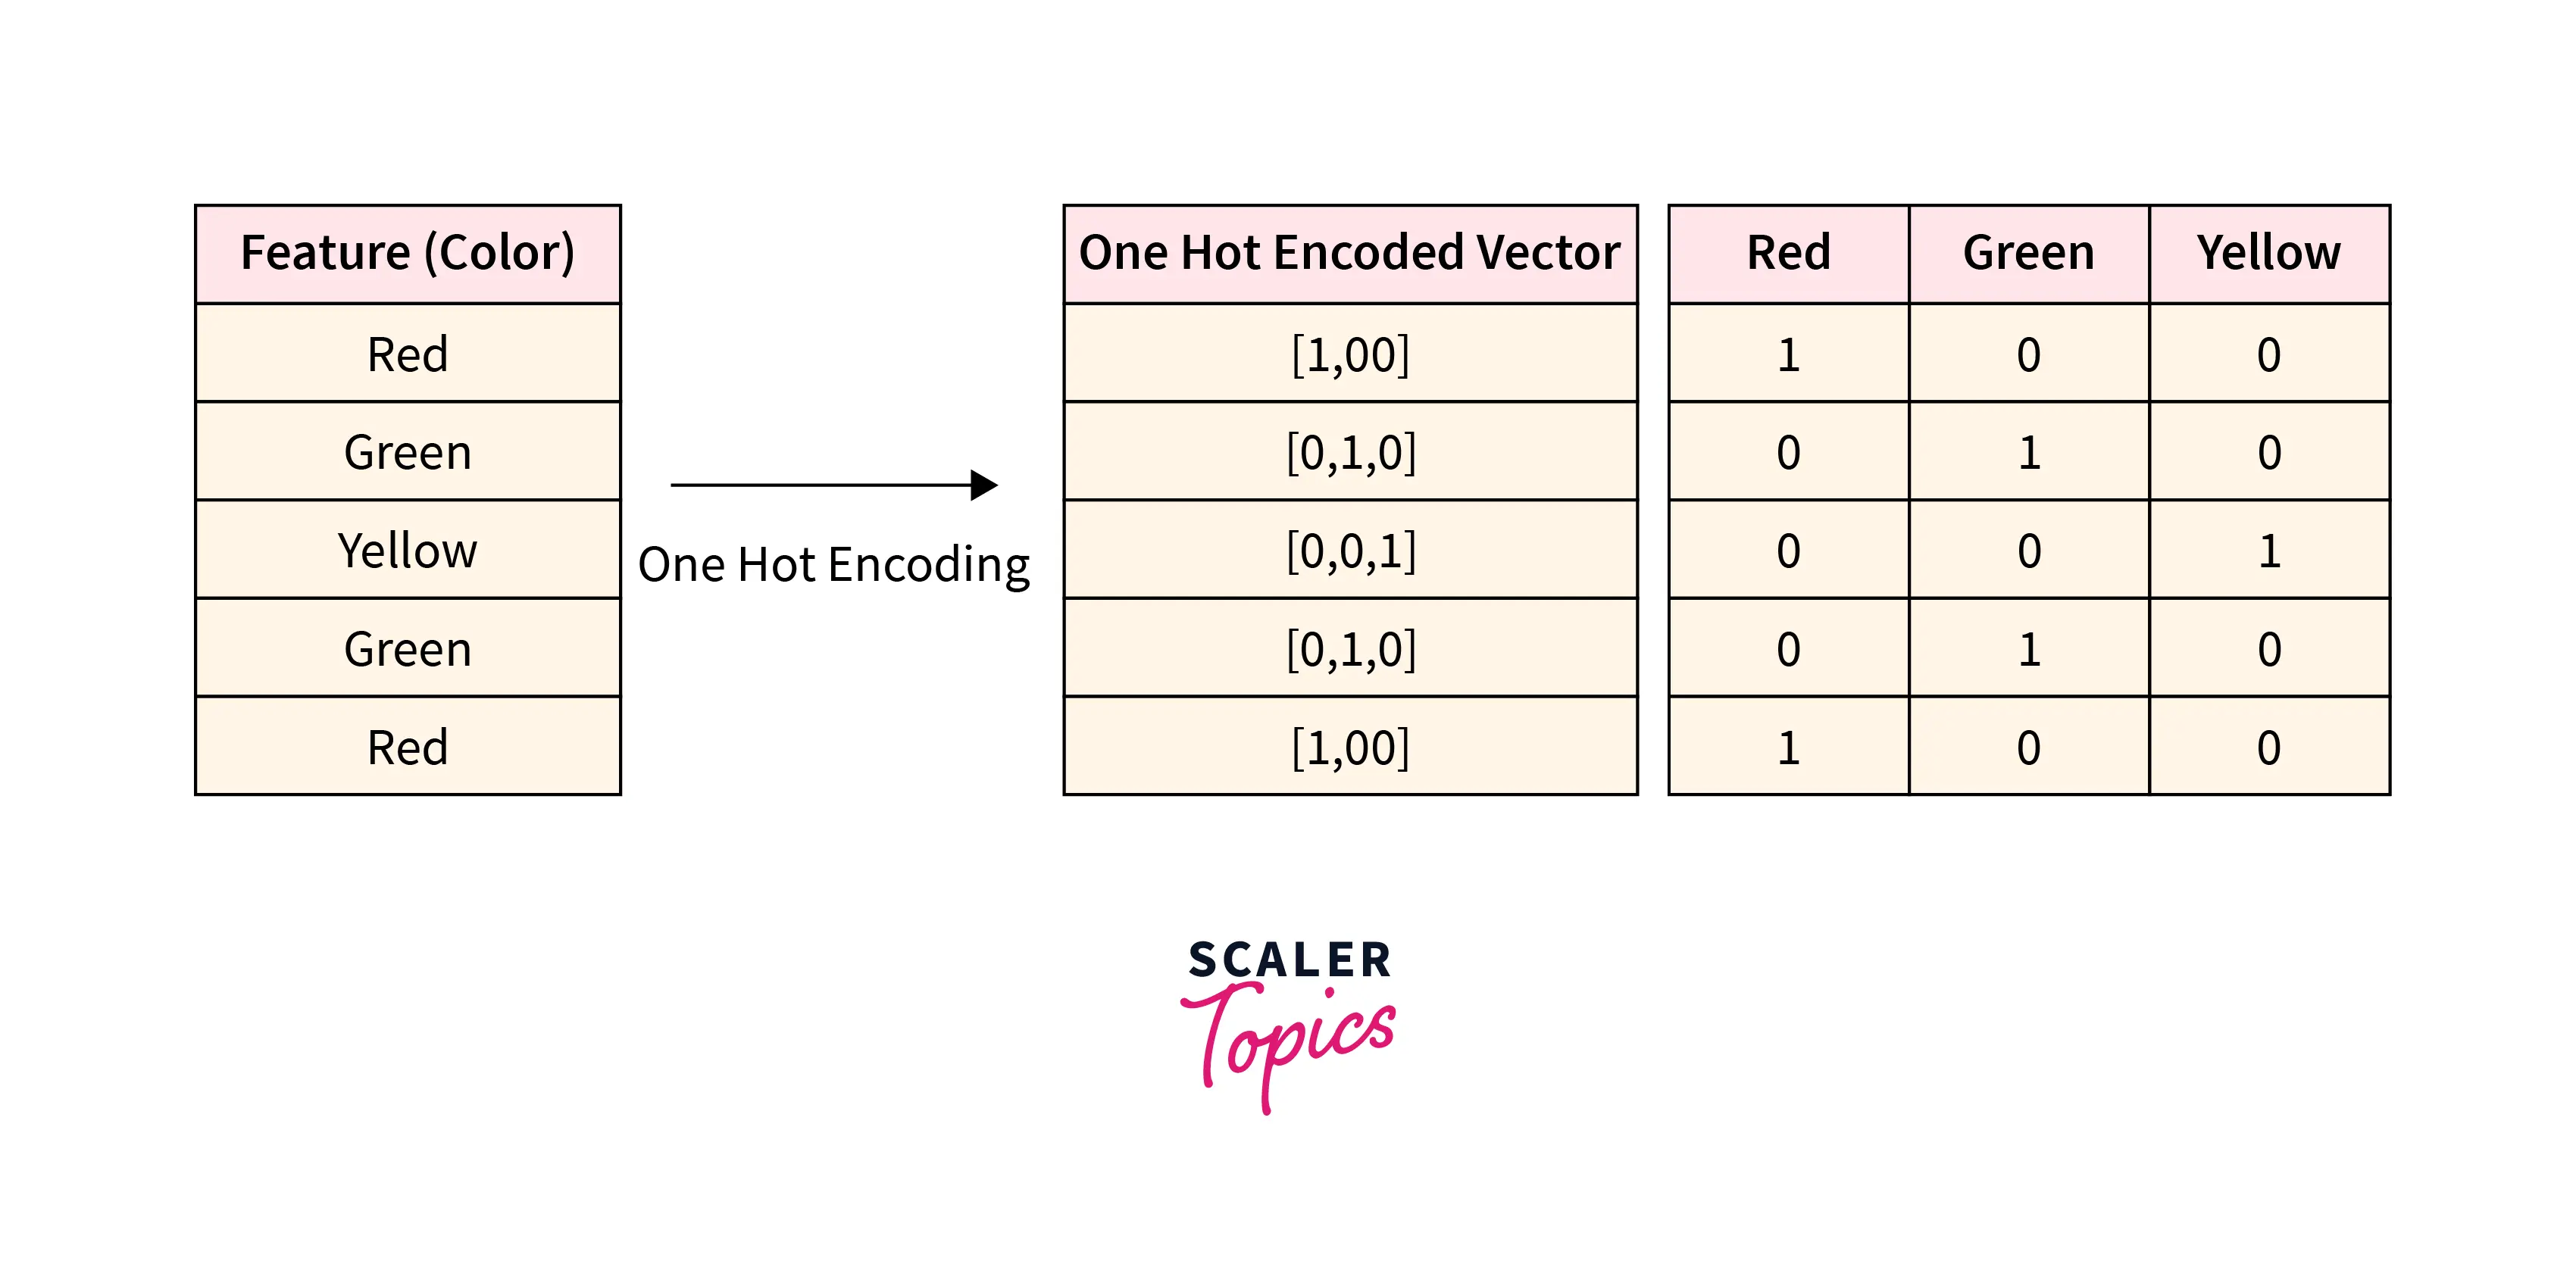

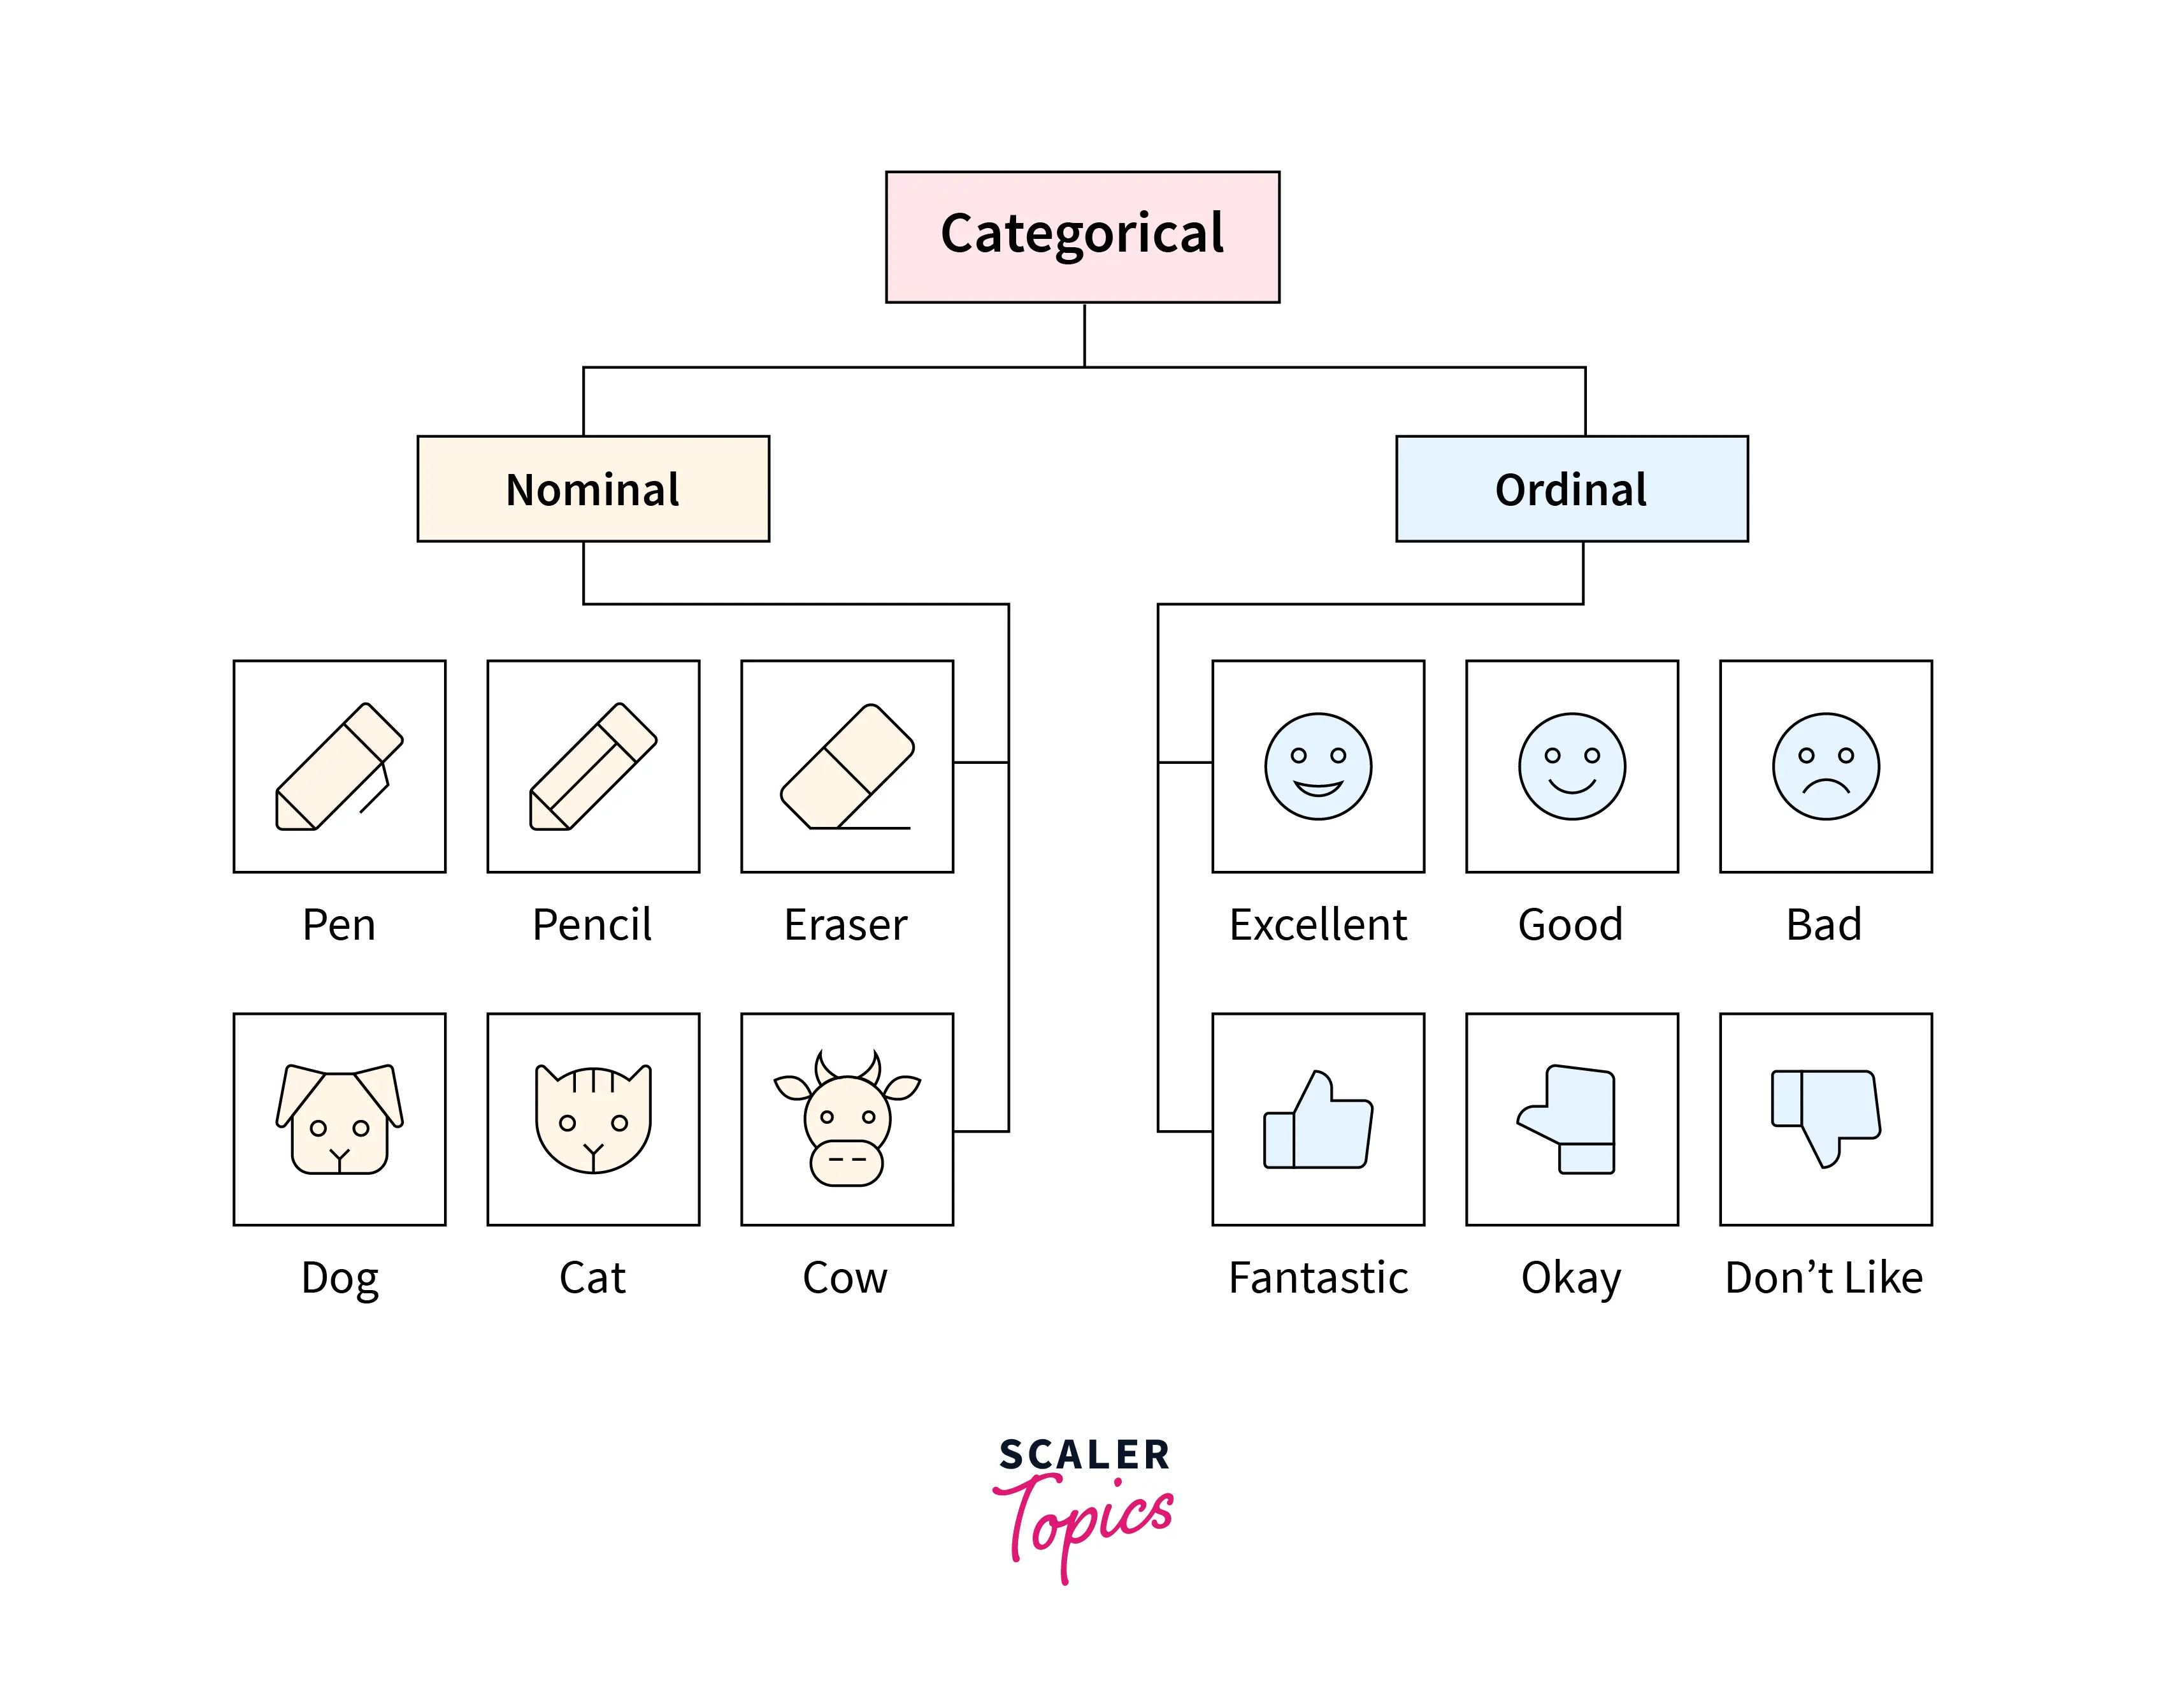



* One Hot Encoding process will create new columns/attributes according to the number of categories present in the dataset. These attributes are called Dummy Variables, which are used as a proxy for categorical variables in ML models. This can result in the Dummy Variable Trap scenario,  
  * where newly created attributes are highly correlated to each other, and the outcome of one variable can be predicted by using other variables. This leads to **multicollinearity**, where input features are not independent of each other in a dataset,

  * and it is a serious issue while training various regression models. To avoid the Dummy Variable Trap,
  
  * we need to drop one dummy variable. So when One Hot Encoding produces n new columns/attributes, we can just use n-1 columns by dropping one redundant column.

  * For example, in the above diagram, we can remove the Yellow column as it can be predicted by other columns. It is a redundant column, as we know that Yellow columns will have a 1 value when **Red and Green columns are 0.** So by dropping it, we can avoid the Dummy Variable Trap without affecting model accuracy.

  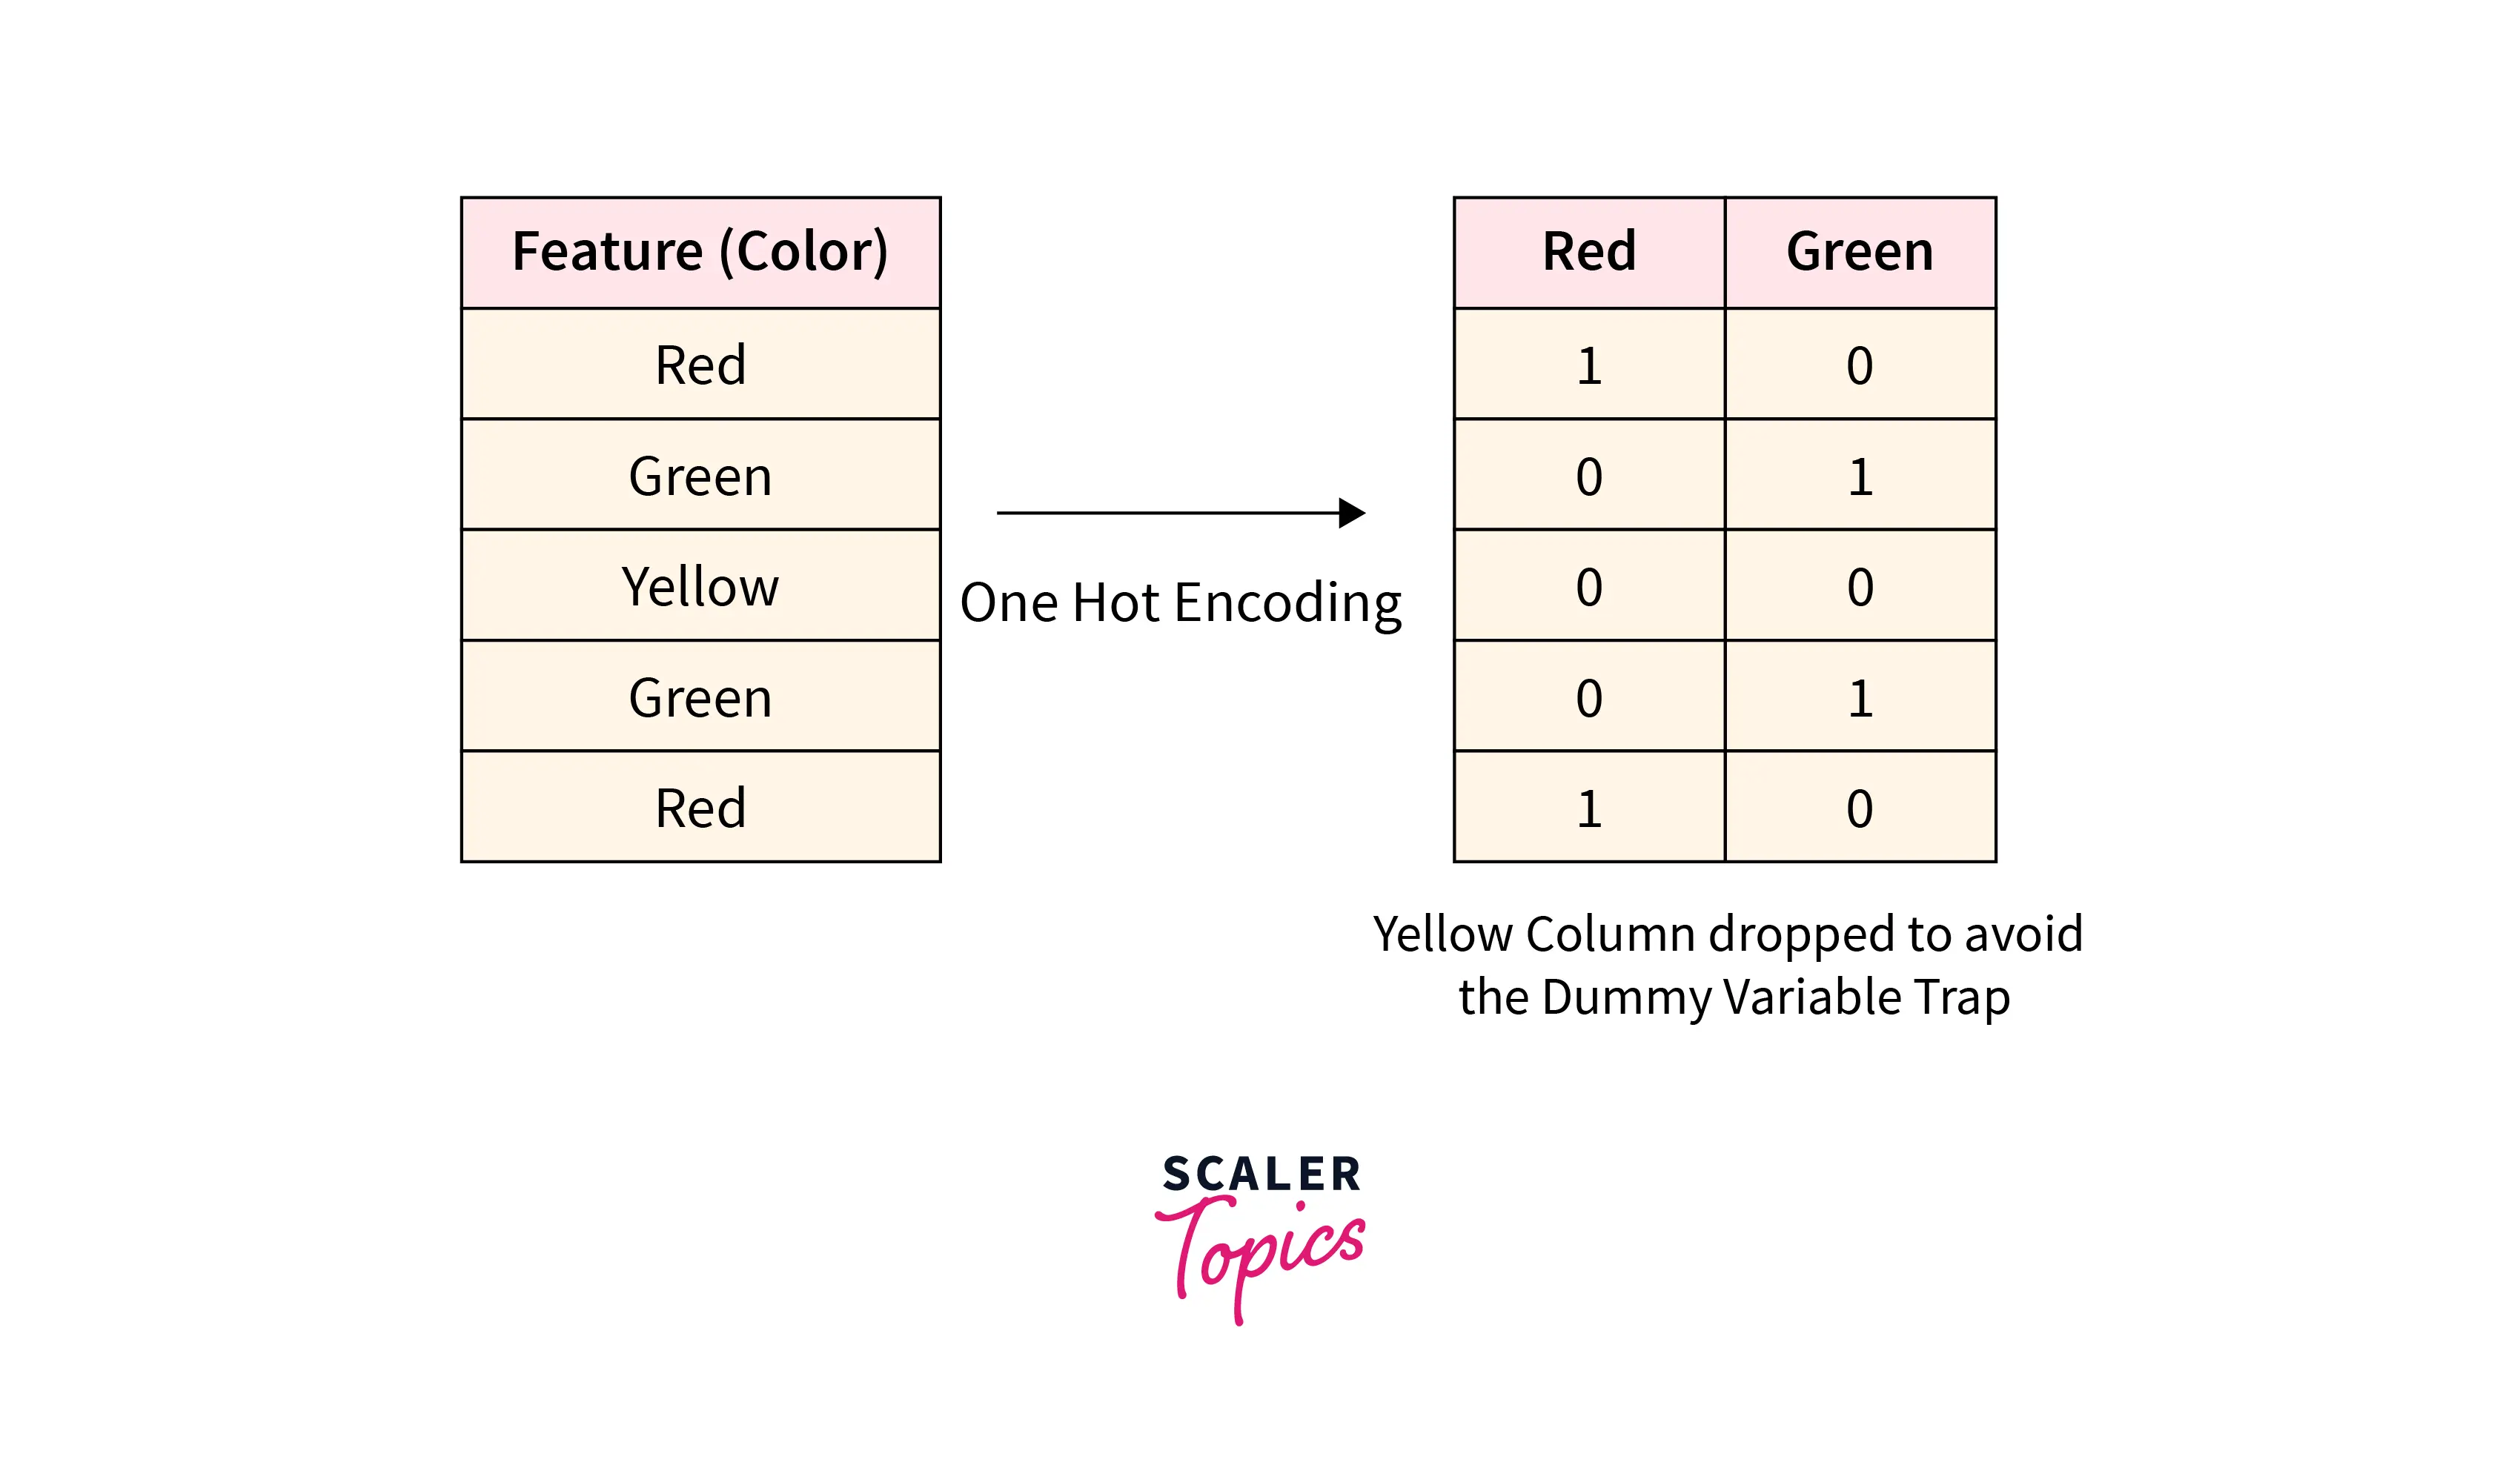

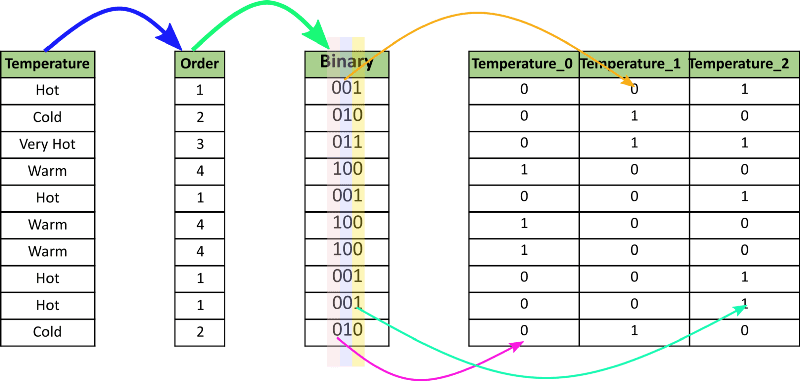

### **Issues with One Hot Encoding**

* **The disadvantages of using one hot encoding include:**
  * It can lead to increased dimensionality, as a separate column is created for each category in the variable. This can make the model more complex and slow to train.

 * It can lead to **sparse data**, as most observations will have a value of 0 in most of the one-hot encoded columns.

 * It can **lead to overfitting,** especially if there are many categories in the variable and the sample size is relatively small.

 * One-hot-encoding is a powerful technique to treat categorical data,
   *  but it can lead to increased **dimensionality, sparsity, and overfitting.**
   * It is important to use it cautiously and consider other methods such as ordinal encoding or binary encoding.

#### **When to Use One Hot Encoding**

> **One Hot Encoding should be used when -**

The categorical features in the dataset are not ordinal, i.e.,
 * there is no natural ordering to their categories.
 * If the number of categories present in the dataset is less, the resulting vector will not suffer from the curse of dimensionality and multicollinearity.



* **Disadvantages:**
 * A high cardinality of higher categories will increase the feature space, resulting in the curse of dimensionality.

In [ ]:
data = sns.load_dataset('titanic')

### **One-Hot Encoding of Categorical Column Using Pandas library**

In [ ]:
Encoded = pd.get_dummies(data['embarked'])
Encoded

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
886,False,False,True
887,False,False,True
888,False,False,True
889,True,False,False


In [ ]:
# from the above to avoid dummy variable trap we remove first col
Encoded = pd.get_dummies(data['embarked'],drop_first=True)
Encoded

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
886,False,True
887,False,True
888,False,True
889,False,False


In [ ]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [ ]:
# with multipule columns
one_hot = pd.get_dummies(data,columns=['embarked','embark_town'])
one_hot.head(8)

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,deck,alive,alone,embarked_C,embarked_Q,embarked_S,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,3,male,22.0,1,0,7.2500,Third,man,True,NaN,no,False,False,False,True,False,False,True
1,1,1,female,38.0,1,0,71.2833,First,woman,False,C,yes,False,True,False,False,True,False,False
2,1,3,female,26.0,0,0,7.9250,Third,woman,False,NaN,yes,True,False,False,True,False,False,True
3,1,1,female,35.0,1,0,53.1000,First,woman,False,C,yes,False,False,False,True,False,False,True
4,0,3,male,35.0,0,0,8.0500,Third,man,True,NaN,no,True,False,False,True,False,False,True
5,0,3,male,NaN,0,0,8.4583,Third,man,True,NaN,no,True,False,True,False,False,True,False
6,0,1,male,54.0,0,0,51.8625,First,man,True,E,no,True,False,False,True,False,False,True
7,0,3,male,2.0,3,1,21.0750,Third,child,False,NaN,no,False,False,False,True,False,False,True


#### **One-Hot Encoding with SKlearn library**




In [ ]:
# using sklearn
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(data[['embarked']].dropna()) # drop NA for avid nan column in data
encoded

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [ ]:
one_hot_encoded_df = pd.DataFrame(encoded,columns= encoder.get_feature_names_out(['embarked']))
one_hot_encoded_df

,embarked_C,embarked_Q,embarked_S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
884,0.0,0.0,1.0
885,0.0,0.0,1.0
886,0.0,0.0,1.0
887,1.0,0.0,0.0


### **3.One Hot Encoding with multiple categories**

In [ ]:
# using sklearn withs fixed multiple cols
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(data[['embarked','embark_town']].dropna()) # drop NA for avid nan column in data
encoded

array([[0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 1.],
       ...,
       [0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 1., 0.]])

In [ ]:
one_hot_encoded_df = pd.DataFrame(encoded,columns= encoder.get_feature_names_out(['embarked','embark_town']))
one_hot_encoded_df

,embarked_C,embarked_Q,embarked_S,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...
884,0.0,0.0,1.0,0.0,0.0,1.0
885,0.0,0.0,1.0,0.0,0.0,1.0
886,0.0,0.0,1.0,0.0,0.0,1.0
887,1.0,0.0,0.0,1.0,0.0,0.0


Aoviding Dummy variable trap or Multicollinearity

 * here we can see embarked_C have multi colinearity with embarked_Q,embarked_S so drop the forst column and same for

In [ ]:
# using sklearn withs fixed multiple cols
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False,drop='first') # dropping first column

encoded = encoder.fit_transform(data[['embarked','embark_town']].dropna()) # drop NA for avid nan column in data
encoded

array([[0., 1., 0., 1.],
       [0., 0., 0., 0.],
       [0., 1., 0., 1.],
       ...,
       [0., 1., 0., 1.],
       [0., 0., 0., 0.],
       [1., 0., 1., 0.]])

In [ ]:
one_hot_encoded_df = pd.DataFrame(encoded,columns= encoder.get_feature_names_out(['embarked','embark_town']))
one_hot_encoded_df # Aftre avoid multicollinearity

,embarked_Q,embarked_S,embark_town_Queenstown,embark_town_Southampton
0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,1.0
...,...,...,...,...
884,0.0,1.0,0.0,1.0
885,0.0,1.0,0.0,1.0
886,0.0,1.0,0.0,1.0
887,0.0,0.0,0.0,0.0


In [ ]:
categorical_columns = data.select_dtypes(include='category').columns.tolist()
categorical_columns

In [ ]:
# with multiple columns
from sklearn.preprocessing import OneHotEncoder

categorical_columns = data.select_dtypes(include=object).columns.tolist()


encoder = OneHotEncoder(sparse_output=False,drop='first') # dropping First col
cat = data[categorical_columns]
encoded = encoder.fit_transform(cat)

# creating Onehot Columns
one_hot_cols = encoder.get_feature_names_out(categorical_columns)

encoded_df = pd.DataFrame(encoded,columns=one_hot_cols)
encoded_df.head() # 5 columns converted into 15

,sex_male,embarked_Q,embarked_S,embarked_nan,who_man,who_woman,embark_town_Queenstown,embark_town_Southampton,embark_town_nan,alive_yes
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
#Now we have to add thease to data
data = pd.concat([data,encoded_df],axis=1)
data.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,sex_male,embarked_Q,embarked_S,embarked_nan,who_man,who_woman,embark_town_Queenstown,embark_town_Southampton,embark_town_nan,alive_yes
0,0,3,male,22.0,1,0,7.2500,S,Third,man,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
print(data.columns.size)
data.columns

25


Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'sex_male', 'embarked_Q', 'embarked_S',
       'embarked_nan', 'who_man', 'who_woman', 'embark_town_Queenstown',
       'embark_town_Southampton', 'embark_town_nan', 'alive_yes'],
      dtype='object')

In [ ]:
# bow remove the categorical columns
data.drop(categorical_columns,axis=1,inplace=True)

In [ ]:
print(data.columns.size)
data.columns                  # wit out droppin first col we got 60 columns don't know # need to know

20


Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'class',
       'adult_male', 'deck', 'alone', 'sex_male', 'embarked_Q', 'embarked_S',
       'embarked_nan', 'who_man', 'who_woman', 'embark_town_Queenstown',
       'embark_town_Southampton', 'embark_town_nan', 'alive_yes'],
      dtype='object')

In [ ]:
data.head(2)

,survived,pclass,age,sibsp,parch,fare,class,adult_male,deck,alone,sex_male,embarked_Q,embarked_S,embarked_nan,who_man,who_woman,embark_town_Queenstown,embark_town_Southampton,embark_town_nan,alive_yes
0,0,3,22.0,1,0,7.2500,Third,True,NaN,False,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1,1,38.0,1,0,71.2833,First,False,C,False,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
data = sns.load_dataset('titanic')

In [ ]:
data.columns.size

15

>**Note :** befor going to multiple column one hot encoding know how many how many individual features are there in each column


In [ ]:
for i in categorical_columns:
  print(data[i].unique()) # all categorical columns have limeted non-identitcal features so we can support the use of one hot encoder

['male' 'female']
['S' 'C' 'Q' nan]
['man' 'woman' 'child']
['Southampton' 'Cherbourg' 'Queenstown' nan]
['no' 'yes']


### **4. Ordinal Encoding**

Ordinal encoding’s encoded variables retain the ordinal (ordered) nature of the variable. It looks similar to label encoding, the only difference being that label coding doesn't consider whether a variable is ordinal or not; it will then assign a sequence of integers.

* Example: Ordinal encoding will assign values as Very Good(1) < Good(2) < Bad(3) < Worse(4)

* natural ordering of the categories - very dissatisfied < dissatisfied < neutral < satisfied < very satisfied

 was retained in 1 < 2 < 3 < 4 < 5.

In [ ]:
temp = {'temperature' :['very cold', 'cold', 'warm', 'hot', 'very hot']}
df=pd.DataFrame(temp,columns=["temperature"])
temp_dict = {'very cold': 1,'cold': 2,'warm': 3,'hot': 4,"very hot":5}
df

,temperature
0,very cold
1,cold
2,warm
3,hot
4,very hot


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
X = encoder.fit_transform(df)

In [ ]:
df['encoded_Temp'] = X
df

,temperature,encoded_Temp
0,very cold,2.0
1,cold,0.0
2,warm,4.0
3,hot,1.0
4,very hot,3.0


**Advantages :**

* Easy and straightforward to implement

* Widely used in survey and research data encoding.

**Disadvantages:**

*  Do not have a standardized interval scale.

### **5. Frequency Encoding**

It is a way to utilize the frequency of the categories as labels. In the cases where the frequency is related somewhat with the target variable, it helps the model to understand and assign the weight in direct and inverse proportion, depending on the nature of the data.

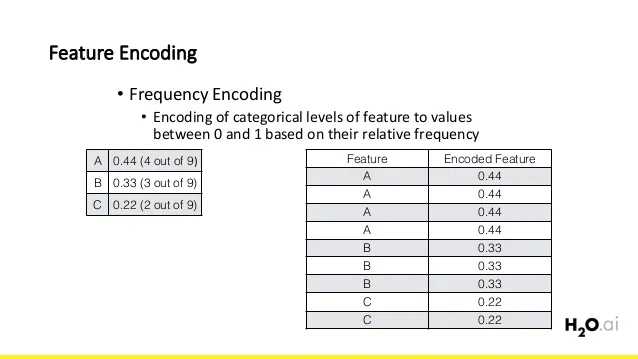

In [ ]:
# find the ferquency
data = data.dropna()
freq= data.groupby('embarked').size()
freq

,0
embarked,
C,65
Q,2
S,115


In [ ]:
# data lenghth
data.shape[0]

182

In [ ]:
#frequency
frq_= freq/data.shape[0]
frq_.to_dict()

{'C': 0.35714285714285715, 'Q': 0.01098901098901099, 'S': 0.6318681318681318}

*  Mapping and rounding off:

In [ ]:
new_df = data['embarked'].dropna()
new_df

,embarked
1,C
3,S
6,S
10,S
11,S
...,...
871,S
872,S
879,C
887,S


In [ ]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [ ]:

new_df['encoded'] = data['embarked'].map(frq_)
new_df

,embarked
1,C
3,S
6,S
10,S
11,S
...,...
872,S
879,C
887,S
889,C


In [ ]:
new_df['encoded']

,embarked
1,0.357143
3,0.631868
6,0.631868
10,0.631868
11,0.631868
...,...
871,0.631868
872,0.631868
879,0.357143
887,0.631868


In [ ]:
Freq_encoder =new_df['encoded']
new_df = pd.concat([new_df,Freq_encoder],axis=1)

In [ ]:
new_df

,embarked,embarked
1,C,0.357143
3,S,0.631868
6,S,0.631868
10,S,0.631868
11,S,0.631868
...,...,...
872,S,0.631868
879,C,0.357143
887,S,0.631868
889,C,0.357143


In [ ]:
# remove the last row
new_df.drop('encoded')

,embarked,embarked
1,C,0.357143
3,S,0.631868
6,S,0.631868
10,S,0.631868
11,S,0.631868
...,...,...
871,S,0.631868
872,S,0.631868
879,C,0.357143
887,S,0.631868


In [ ]:
new_df['embarked'] # somthing wnet wrong

,embarked,embarked
1,C,0.357143
3,S,0.631868
6,S,0.631868
10,S,0.631868
11,S,0.631868
...,...,...
872,S,0.631868
879,C,0.357143
887,S,0.631868
889,C,0.357143


In [ ]:
new_df.rename(columns={'embarked':'embarked','embarked':'frq_encoder'})

,frq_encoder,frq_encoder
1,C,0.357143
3,S,0.631868
6,S,0.631868
10,S,0.631868
11,S,0.631868
...,...,...
872,S,0.631868
879,C,0.357143
887,S,0.631868
889,C,0.357143


### **6. Mean Encoding**